<a href="https://colab.research.google.com/github/bahargholami20035/numerical-interpolation/blob/main/lagrange_cubicSpline_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 1: sin(x)


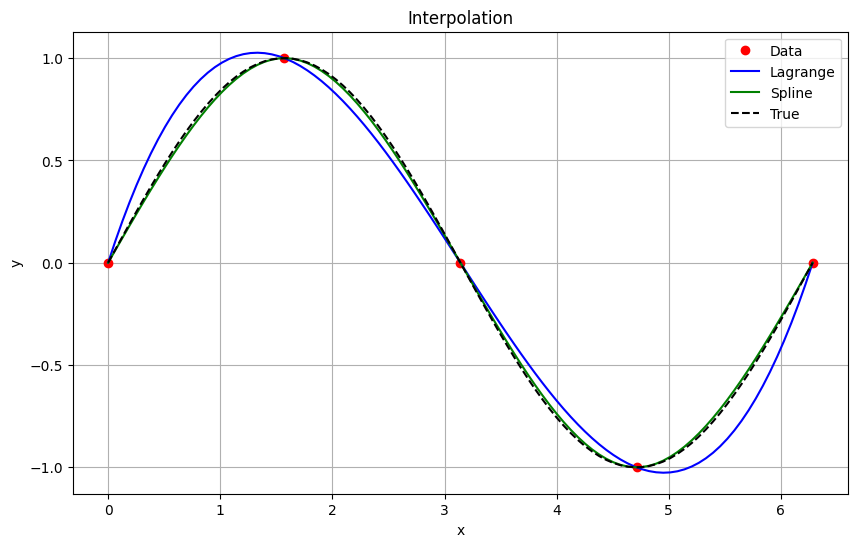


Example 2: Data points


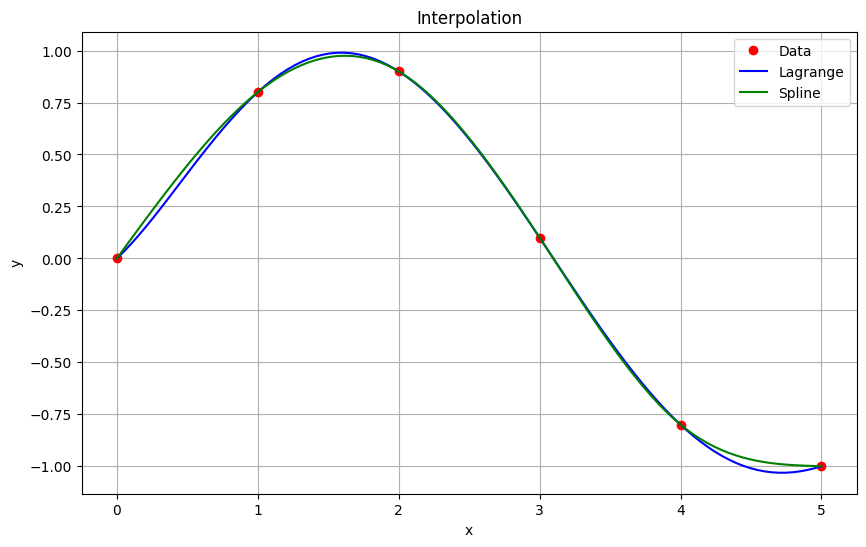


Example 3: Runge's Phenomenon


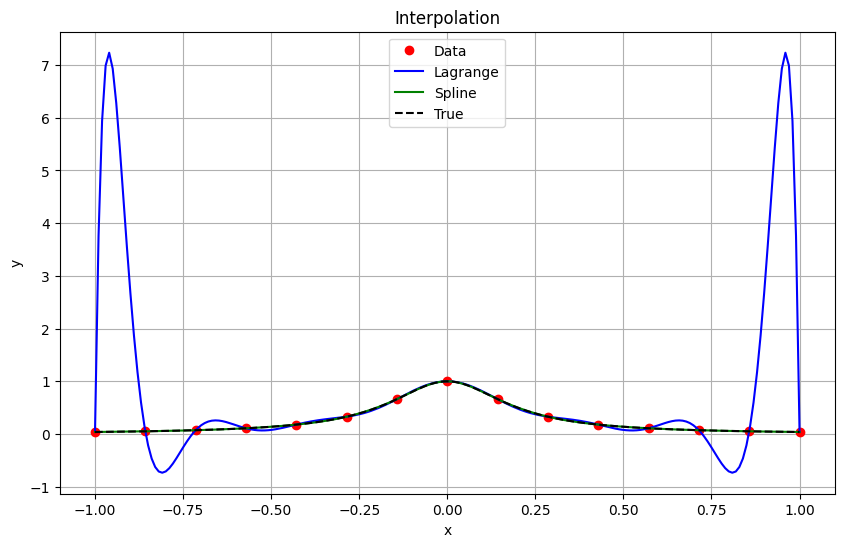


Example 4: Chebyshev Nodes


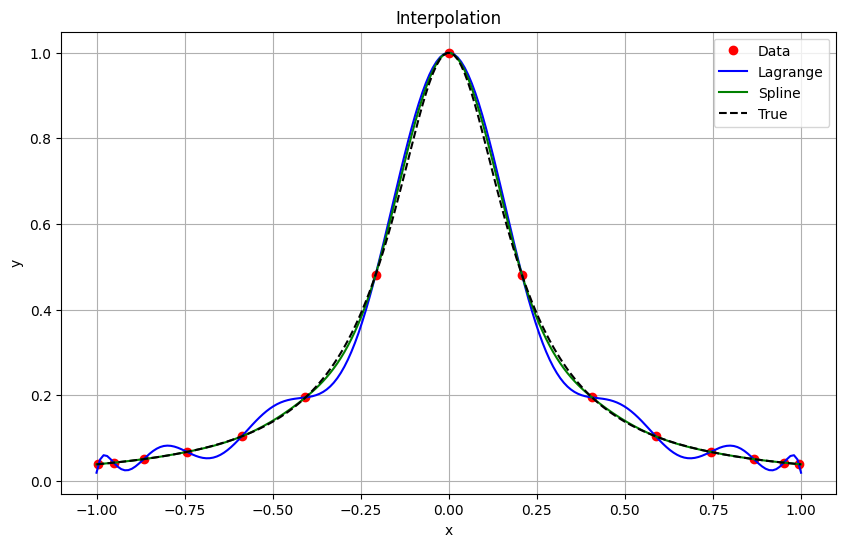

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.sin(x)

def lagrange_interp(x_nodes, y_nodes, x_eval):
    if len(set(x_nodes)) != len(x_nodes):
        raise ValueError("x_nodes must be unique.")

    n = len(x_nodes)
    L = np.ones((n, len(x_eval)))

    for j in range(n):
        for k in range(n):
            if j != k:
                L[j] *= (x_eval - x_nodes[k]) / (x_nodes[j] - x_nodes[k])

    y_interp = np.sum(y_nodes[:, None] * L, axis=0)
    return y_interp

def cubic_spline_interp(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)

    if np.any(np.diff(x_nodes) <= 0):
        raise ValueError("x_nodes must be strictly increasing.")

    h = np.diff(x_nodes)
    alpha = np.zeros(n)

    for i in range(1, n - 1):
        alpha[i] = (3 / h[i]) * (y_nodes[i + 1] - y_nodes[i]) - (3 / h[i - 1]) * (y_nodes[i] - y_nodes[i - 1])

    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)

    for i in range(1, n - 1):
        l[i] = 2 * (x_nodes[i + 1] - x_nodes[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    b = np.zeros(n - 1)
    c = np.zeros(n)
    d = np.zeros(n - 1)

    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y_nodes[j + 1] - y_nodes[j]) / h[j] - (h[j] * (c[j + 1] + 2 * c[j])) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    y_interp = np.zeros_like(x_eval)

    for i, x in enumerate(x_eval):
        j = np.searchsorted(x_nodes, x) - 1
        if j < 0:
            j = 0
        elif j >= n - 1:
            j = n - 2

        dx = x - x_nodes[j]
        y_interp[i] = y_nodes[j] + b[j] * dx + c[j] * dx**2 + d[j] * dx**3

    return y_interp

def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(1, n + 1)
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))

def plot_it(x_nodes, y_nodes, x_eval, y_lagrange, y_spline, true_func=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x_nodes, y_nodes, 'ro', label='Data')
    plt.plot(x_eval, y_lagrange, 'b-', label='Lagrange')
    plt.plot(x_eval, y_spline, 'g-', label='Spline')

    if true_func:
        y_true = true_func(x_eval)
        plt.plot(x_eval, y_true, 'k--', label='True')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    print("Example 1: sin(x)")
    x_n = np.linspace(0, 2 * np.pi, 5)
    y_n = f1(x_n)
    x_e = np.linspace(0, 2 * np.pi, 100)

    y_lag = lagrange_interp(x_n, y_n, x_e)
    y_spl = cubic_spline_interp(x_n, y_n, x_e)
    plot_it(x_n, y_n, x_e, y_lag, y_spl, true_func=f1)

    print("\nExample 2: Data points")
    x_data = np.array([0, 1, 2, 3, 4, 5])
    y_data = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])
    x_eval2 = np.linspace(0, 5, 100)

    y_lagrange2 = lagrange_interp(x_data, y_data, x_eval2)
    y_spline2 = cubic_spline_interp(x_data, y_data, x_eval2)
    plot_it(x_data, y_data, x_eval2, y_lagrange2, y_spline2)

    print("\nExample 3: Runge's Phenomenon")
    def runge(x):
        return 1 / (1 + 25 * x**2)

    n_nodes = 15
    x_nodes_runge = np.linspace(-1, 1, n_nodes)
    y_runge = runge(x_nodes_runge)
    x_eval_runge = np.linspace(-1, 1, 200)

    y_lr = lagrange_interp(x_nodes_runge, y_runge, x_eval_runge)
    y_sr = cubic_spline_interp(x_nodes_runge, y_runge, x_eval_runge)
    plot_it(x_nodes_runge, y_runge, x_eval_runge, y_lr, y_sr, true_func=runge)

    print("\nExample 4: Chebyshev Nodes")
    n_cheb = 15
    x_cheb = np.sort(chebyshev_nodes(n_cheb))
    y_cheb = runge(x_cheb)
    xe_cheb = np.linspace(-1, 1, 200)

    y_lag_cheb = lagrange_interp(x_cheb, y_cheb, xe_cheb)
    y_spl_cheb = cubic_spline_interp(x_cheb, y_cheb, xe_cheb)
    plot_it(x_cheb, y_cheb, xe_cheb, y_lag_cheb, y_spl_cheb, true_func=runge)

if __name__ == "__main__":
    main()
